In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
df=pd.read_excel("MIDMARKS-MINOR1-EXAM.xlsx")
df

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1,ALPHA,12,0,17,9,19,15
1,2,ALPHA,19,12,16,16,18,3
2,3,ALPHA,18,14,18,18,18,16
3,4,ALPHA,15,9,19,17,19,15
4,5,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...,...
475,476,NaN,18,2,12,3,17,15
476,477,NaN,20,6,16,11,20,14
477,478,NaN,20,NaN,18,13,20,18
478,479,NaN,20,20,5,19,18,14


1. Importing pandas to read and manipulate data

2. Importing numpy to perform mathematical operations

3. Importing matplotlib as it provides a powerful and versatile tool for creating various types of visualizations

4. Importing warnings to ignore warnings which do not have impact on the result

Reading the excel file.
We will use read_excel for xlsx file and read_csv for csv file

In [13]:
warnings.filterwarnings('ignore')

command that tells the program to ignore warning messages.

In [14]:
df.shape

(480, 8)

a property in pandas that tells you the number of rows and columns in a DataFrame.

In [15]:
df.size

3840

returns the total number of elements (cells) in the DataFrame.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   S.NO     480 non-null    int64 
 1   SECTION  439 non-null    object
 2   DV       479 non-null    object
 3   M-II     477 non-null    object
 4   PP       480 non-null    object
 5   BEEE     478 non-null    object
 6   FL       479 non-null    object
 7   FIMS     480 non-null    object
dtypes: int64(1), object(7)
memory usage: 30.1+ KB


method that provides a summary of the DataFrame, including the number of rows and columns, the data types of each column, the number of non-null values in each column, the memory usage of the DataFrame

In [17]:
df.dtypes

S.NO        int64
SECTION    object
DV         object
M-II       object
PP         object
BEEE       object
FL         object
FIMS       object
dtype: object

pandas property that returns the data type of each column in a DataFrame.

In [18]:
df.head()

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1,ALPHA,12,0,17,9,19,15
1,2,ALPHA,19,12,16,16,18,3
2,3,ALPHA,18,14,18,18,18,16
3,4,ALPHA,15,9,19,17,19,15
4,5,ALPHA,18,17,19,19,20,18


shows the first 5 rows of a DataFrame by default

In [19]:
df.isnull().sum()

S.NO        0
SECTION    41
DV          1
M-II        3
PP          0
BEEE        2
FL          1
FIMS        0
dtype: int64

There are few empty fields in all columns so we need to fill them

In [20]:
df.rename(columns={'M-II':'M2'},inplace=True)
df['S.NO'] = range(1, len(df) + 1)
df

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS
0,1,ALPHA,12,0,17,9,19,15
1,2,ALPHA,19,12,16,16,18,3
2,3,ALPHA,18,14,18,18,18,16
3,4,ALPHA,15,9,19,17,19,15
4,5,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...,...
475,476,NaN,18,2,12,3,17,15
476,477,NaN,20,6,16,11,20,14
477,478,NaN,20,NaN,18,13,20,18
478,479,NaN,20,20,5,19,18,14


Renaming M-II column name to M2 as Roman numbers are not accepted.

S.No is added and is used to get the S.No. of each student

In [21]:
df['SECTION'].value_counts()

ALPHA      60
BETA       60
DELTA      60
EPSILON    60
GAMMA      60
OMEGA      60
SIGMA      60
ZETA       19
Name: SECTION, dtype: int64

We can see that Section: Zeta have 41 empty records

In [22]:
df['SECTION'] = df['SECTION'].fillna('ZETA') 
df['SECTION'] = df['SECTION'].replace('', 'ZETA')
df

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS
0,1,ALPHA,12,0,17,9,19,15
1,2,ALPHA,19,12,16,16,18,3
2,3,ALPHA,18,14,18,18,18,16
3,4,ALPHA,15,9,19,17,19,15
4,5,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...,...
475,476,ZETA,18,2,12,3,17,15
476,477,ZETA,20,6,16,11,20,14
477,478,ZETA,20,NaN,18,13,20,18
478,479,ZETA,20,20,5,19,18,14


There are few empty fields in Section column and we are assuming it to be ZETA so the empty fields in Section column are filled with "ZETA"

In [23]:
df.isnull().sum()

S.NO       0
SECTION    0
DV         1
M2         3
PP         0
BEEE       2
FL         1
FIMS       0
dtype: int64

Checking for the empty fields.

In [24]:
df.DV.value_counts()

17    53
20    53
18    48
16    48
15    45
19    38
11    31
12    27
13    25
14    24
10    22
9     14
8     10
6      9
5      8
7      6
A      6
2      4
1      3
4      3
3      1
MP     1
Name: DV, dtype: int64

This command counts the occurrences of unique values in the DV column

We found that there are 3 values of string type "AB","A","MP", where AB and A stands for absent and MP stands for Malpractice

In [25]:
df['M2'].value_counts()

20    44
3     34
17    32
8     29
0     24
12    24
11    24
15    24
5     23
18    23
4     22
10    20
6     18
13    18
9     17
14    17
1     17
16    16
7     14
2     13
19    12
AB     5
o      3
A      2
II     1
I      1
Name: M2, dtype: int64

In [26]:
df['PP'].value_counts()

20    70
18    35
19    35
17    31
12    29
16    28
14    28
11    28
15    27
9     24
10    19
6     18
13    15
5     15
3     13
2     13
8     12
4     10
7     10
1      7
A      6
0      3
AB     3
MP     1
Name: PP, dtype: int64

In [27]:
df['BEEE'].value_counts()

20    76
17    46
19    42
18    31
11    31
15    28
16    23
12    21
14    21
10    20
9     19
6     15
7     15
13    14
3     14
A     13
8     13
4     12
5     10
2      9
1      3
o      1
0      1
Name: BEEE, dtype: int64

In [28]:
df['FL'].value_counts()

20    121
15     85
18     59
10     55
13     50
19     34
16     15
14     11
11     10
17      9
A       9
12      8
8       6
9       3
6       2
7       2
Name: FL, dtype: int64

In [29]:
df['FIMS'].value_counts()

18    62
15    57
16    50
17    41
14    40
13    36
19    35
9     28
11    22
12    20
10    19
20    12
8     11
AB     8
A      6
3      6
6      5
4      5
7      5
5      5
2      3
1      3
0      1
Name: FIMS, dtype: int64

In [31]:
df=df.replace("o",0)
df=df.replace("A",-1)
df=df.replace("AB",-1)
df=df.replace("MP",-2)
df=df.replace("I",1)
df=df.replace("II",11)
df

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS
0,1,ALPHA,12.0,0.0,17,9.0,19.0,15
1,2,ALPHA,19.0,12.0,16,16.0,18.0,3
2,3,ALPHA,18.0,14.0,18,18.0,18.0,16
3,4,ALPHA,15.0,9.0,19,17.0,19.0,15
4,5,ALPHA,18.0,17.0,19,19.0,20.0,18
...,...,...,...,...,...,...,...,...
475,476,ZETA,18.0,2.0,12,3.0,17.0,15
476,477,ZETA,20.0,6.0,16,11.0,20.0,14
477,478,ZETA,20.0,NaN,18,13.0,20.0,18
478,479,ZETA,20.0,20.0,5,19.0,18.0,14


We are replacing Absent values [AB, A] with -1 and Malpractice values [MP] with -2 but we are not replacing those values with 0 because 0 can be the score of the student and we are excluding the students who are absent instead of including them and getting wrong analysis

We can observe that there are few typing error where 0 is entered as 'o', 1 as 'I', 11 as 'II'

In [33]:
numeric_cols = df.columns[2:]
df[numeric_cols] = df[numeric_cols].apply(lambda row: row.fillna(row.mean()), axis=1)
df


,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0
...,...,...,...,...,...,...,...,...
475,476,ZETA,18.0,2.0,12.0,3.0,17.0,15.0
476,477,ZETA,20.0,6.0,16.0,11.0,20.0,14.0
477,478,ZETA,20.0,17.8,18.0,13.0,20.0,18.0
478,479,ZETA,20.0,20.0,5.0,19.0,18.0,14.0


We are filling the empty record by calculating the average of particular person's other subject marks

In [34]:
df['Total']=df['DV']+df['M2']+df['PP']+df['BEEE']+df['FL']+df['FIMS']
df

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0
...,...,...,...,...,...,...,...,...,...
475,476,ZETA,18.0,2.0,12.0,3.0,17.0,15.0,67.0
476,477,ZETA,20.0,6.0,16.0,11.0,20.0,14.0,87.0
477,478,ZETA,20.0,17.8,18.0,13.0,20.0,18.0,106.8
478,479,ZETA,20.0,20.0,5.0,19.0,18.0,14.0,96.0


Adding new column Total by adding marks of all subjects of each student

In [35]:
df['Percentage']=round((df['Total']/120)*100,2)
df

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60.00
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70.00
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85.00
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78.33
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92.50
...,...,...,...,...,...,...,...,...,...,...
475,476,ZETA,18.0,2.0,12.0,3.0,17.0,15.0,67.0,55.83
476,477,ZETA,20.0,6.0,16.0,11.0,20.0,14.0,87.0,72.50
477,478,ZETA,20.0,17.8,18.0,13.0,20.0,18.0,106.8,89.00
478,479,ZETA,20.0,20.0,5.0,19.0,18.0,14.0,96.0,80.00


Adding new column Percentage of each student and rounding off it to 2 decimals

In [36]:
df.loc[(df["Percentage"]>90) & (df["Percentage"]<=100),["Grade"]]="A+"
df.loc[(df["Percentage"]>80) & (df["Percentage"]<=90),["Grade"]]="A"
df.loc[(df["Percentage"]>70) & (df["Percentage"]<=80),["Grade"]]="B+"
df.loc[(df["Percentage"]>60) & (df["Percentage"]<=70),["Grade"]]="B"
df.loc[(df["Percentage"]>=50) & (df["Percentage"]<=60),["Grade"]]="C"
df.loc[(df["Percentage"]>0) & (df["Percentage"]<50),["Grade"]]="F"
df.loc[(df["Percentage"]==0),["Grade"]]="AB"

df

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60.00,C
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70.00,B
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85.00,A
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78.33,B+
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92.50,A+
...,...,...,...,...,...,...,...,...,...,...,...
475,476,ZETA,18.0,2.0,12.0,3.0,17.0,15.0,67.0,55.83,C
476,477,ZETA,20.0,6.0,16.0,11.0,20.0,14.0,87.0,72.50,B+
477,478,ZETA,20.0,17.8,18.0,13.0,20.0,18.0,106.8,89.00,A
478,479,ZETA,20.0,20.0,5.0,19.0,18.0,14.0,96.0,80.00,B+


Adding new column Grade of each student according to the given criteria 

In [37]:
a=df.loc[(df['DV'] >= 10) & (df['DV'] <= 20)]
a=a.reset_index()
a

,index,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
0,0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60.00,C
1,1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70.00,B
2,2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85.00,A
3,3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78.33,B+
4,4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92.50,A+
...,...,...,...,...,...,...,...,...,...,...,...,...
410,475,476,ZETA,18.0,2.0,12.0,3.0,17.0,15.0,67.0,55.83,C
411,476,477,ZETA,20.0,6.0,16.0,11.0,20.0,14.0,87.0,72.50,B+
412,477,478,ZETA,20.0,17.8,18.0,13.0,20.0,18.0,106.8,89.00,A
413,478,479,ZETA,20.0,20.0,5.0,19.0,18.0,14.0,96.0,80.00,B+


This filters rows in df where the value in the DV column is between 10 and 20 where both the values 10 and 20 are included

Text(0, 0.5, 'Marks in DV')

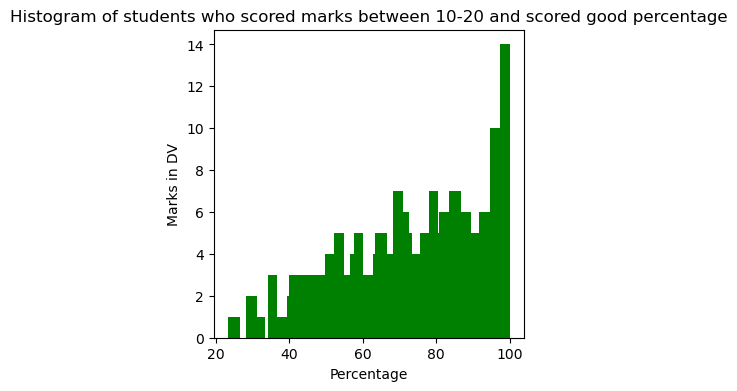

In [38]:
a1=a.groupby('DV')['Percentage']
a1.hist(color='green',figsize=[4,4],grid=False,bins=20)
plt.title("Histogram of students who scored marks between 10-20 and scored good percentage")
plt.xlabel('Percentage')
plt.ylabel('Marks in DV')

Uses filtered data and plotting the grpah using their percentage.

Students scored between 10 and 20 marks in DV subject

In [39]:
a=df.loc[(df['M2'] >= 10) & (df['M2'] <= 20)]
a=a.reset_index()
a

,index,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
0,1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70.00,B
1,2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85.00,A
2,4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92.50,A+
3,5,6,ALPHA,17.0,16.0,18.0,10.0,15.0,9.0,85.0,70.83,B+
4,6,7,ALPHA,15.0,10.0,20.0,20.0,15.0,14.0,94.0,78.33,B+
...,...,...,...,...,...,...,...,...,...,...,...,...
252,472,473,ZETA,20.0,18.0,20.0,20.0,20.0,19.0,117.0,97.50,A+
253,473,474,ZETA,20.0,20.0,20.0,20.0,20.0,20.0,120.0,100.00,A+
254,477,478,ZETA,20.0,17.8,18.0,13.0,20.0,18.0,106.8,89.00,A
255,478,479,ZETA,20.0,20.0,5.0,19.0,18.0,14.0,96.0,80.00,B+


This filters rows in df where the value in the M2 column is between 10 and 20 where both the values 10 and 20 are included

Text(0, 0.5, 'Marks in M2')

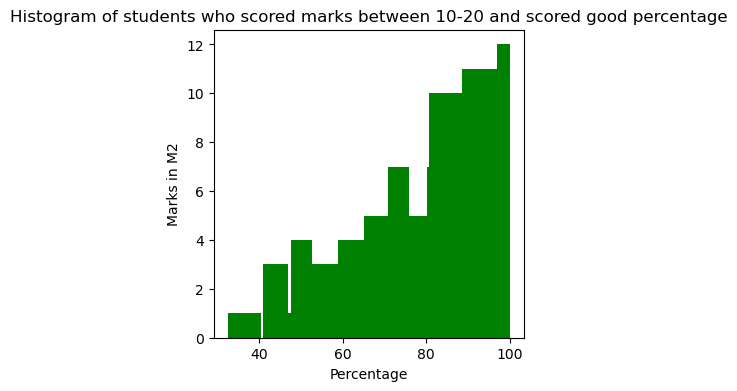

In [40]:
a1=a.groupby('M2')['Percentage']
a1.hist(color='green',figsize=[4,4],grid=False,bins=8)
plt.title("Histogram of students who scored marks between 10-20 and scored good percentage")
plt.xlabel('Percentage')
plt.ylabel('Marks in M2')

Students scored between 10 and 20 marks in M2 subject

In [41]:
a=df.loc[(df['PP'] >= 10) & (df['PP'] <= 20)]
a=a.reset_index()
a

,index,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
0,0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60.00,C
1,1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70.00,B
2,2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85.00,A
3,3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78.33,B+
4,4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92.50,A+
...,...,...,...,...,...,...,...,...,...,...,...,...
340,473,474,ZETA,20.0,20.0,20.0,20.0,20.0,20.0,120.0,100.00,A+
341,475,476,ZETA,18.0,2.0,12.0,3.0,17.0,15.0,67.0,55.83,C
342,476,477,ZETA,20.0,6.0,16.0,11.0,20.0,14.0,87.0,72.50,B+
343,477,478,ZETA,20.0,17.8,18.0,13.0,20.0,18.0,106.8,89.00,A


This filters rows in df where the value in the PP column is between 10 and 20 where both the values 10 and 20 are included

Text(0, 0.5, 'Marks in PP')

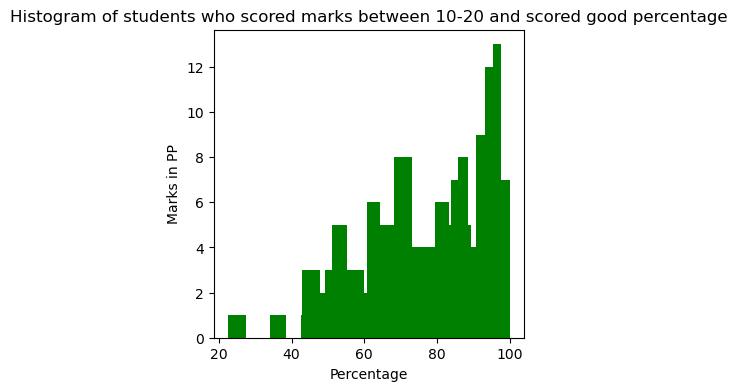

In [42]:
a1=a.groupby('PP')['Percentage']
a1.hist(color='green',figsize=[4,4],grid=False,bins=13)
plt.title("Histogram of students who scored marks between 10-20 and scored good percentage")
plt.xlabel('Percentage')
plt.ylabel('Marks in PP')

Students scored between 10 and 20 marks in PP subject

In [43]:
a=df.loc[(df['FL'] >= 10) & (df['FL'] <= 20)]
a=a.reset_index()
a

,index,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
0,0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60.00,C
1,1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70.00,B
2,2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85.00,A
3,3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78.33,B+
4,4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92.50,A+
...,...,...,...,...,...,...,...,...,...,...,...,...
453,475,476,ZETA,18.0,2.0,12.0,3.0,17.0,15.0,67.0,55.83,C
454,476,477,ZETA,20.0,6.0,16.0,11.0,20.0,14.0,87.0,72.50,B+
455,477,478,ZETA,20.0,17.8,18.0,13.0,20.0,18.0,106.8,89.00,A
456,478,479,ZETA,20.0,20.0,5.0,19.0,18.0,14.0,96.0,80.00,B+


This filters rows in df where the value in the FL column is between 10 and 20 where both the values 10 and 20 are included

Text(0, 0.5, 'Marks in DV')

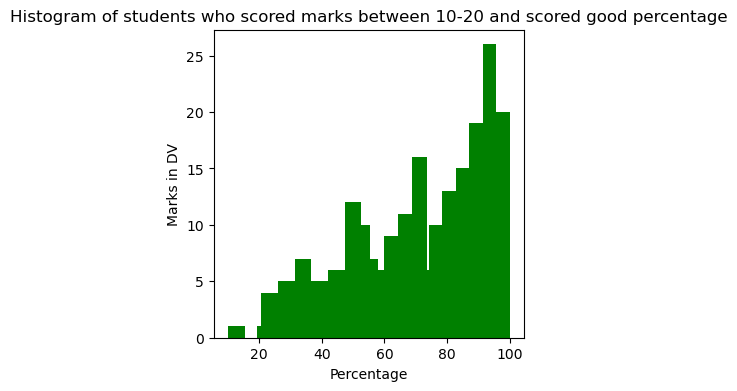

In [44]:
a1=a.groupby('FL')['Percentage']
a1.hist(color='green',figsize=[4,4],grid=False,bins=13)
plt.title("Histogram of students who scored marks between 10-20 and scored good percentage")
plt.xlabel('Percentage')
plt.ylabel('Marks in DV')

Students scored between 10 and 20 marks in FL subject

In [45]:
a=df.loc[(df['FIMS'] >= 10) & (df['FIMS'] <= 20)]
a=a.reset_index()
a

,index,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
0,0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60.00,C
1,2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85.00,A
2,3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78.33,B+
3,4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92.50,A+
4,6,7,ALPHA,15.0,10.0,20.0,20.0,15.0,14.0,94.0,78.33,B+
...,...,...,...,...,...,...,...,...,...,...,...,...
389,475,476,ZETA,18.0,2.0,12.0,3.0,17.0,15.0,67.0,55.83,C
390,476,477,ZETA,20.0,6.0,16.0,11.0,20.0,14.0,87.0,72.50,B+
391,477,478,ZETA,20.0,17.8,18.0,13.0,20.0,18.0,106.8,89.00,A
392,478,479,ZETA,20.0,20.0,5.0,19.0,18.0,14.0,96.0,80.00,B+


This filters rows in df where the value in the FIMS column is between 10 and 20 where both the values 10 and 20 are included

Text(0, 0.5, 'Marks in DV')

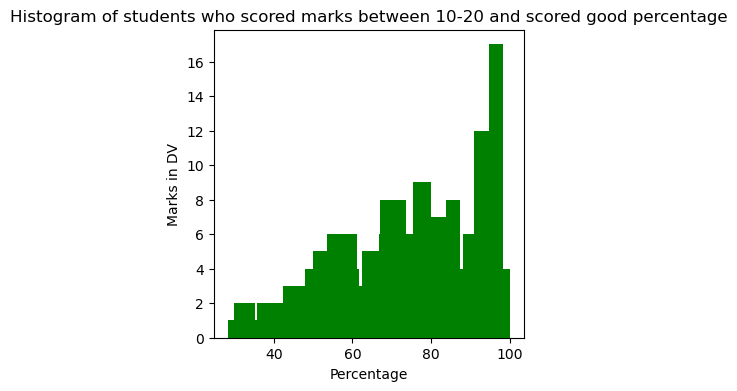

In [46]:
a1=a.groupby('FIMS')['Percentage']
a1.hist(color='green',figsize=[4,4],grid=False,bins=13)
plt.title("Histogram of students who scored marks between 10-20 and scored good percentage")
plt.xlabel('Percentage')
plt.ylabel('Marks in DV')

Students scored between 10 and 20 marks in FIMS subject

In [47]:
fail_table=df[(df.PP<8) & (df.DV<8) & (df.M2<8) & (df.BEEE<8) & (df.FL<8) & (df.FIMS<8)]
fail_table

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
82,83,BETA,2.0,0.0,2.0,-1.0,-1.0,-1.0,1.0,0.83,F
210,211,EPSILON,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-6.0,-5.00,NaN
302,303,OMEGA,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-6.0,-5.00,NaN
368,369,ZETA,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-6.0,-5.00,NaN
380,381,OMEGA,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-6.0,-5.00,NaN
424,425,SIGMA,6.0,1.0,-1.0,-1.0,-1.0,-1.0,3.0,2.50,F
453,454,ZETA,1.0,5.0,0.0,-1.0,-1.0,-1.0,3.0,2.50,F
461,462,ZETA,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-6.0,-5.00,NaN


This line of code filters the DataFrame df to create a new DataFrame fail_table that contains only rows where all six subjects have marks below 8.

In [48]:
b=df.loc[(df['Percentage'] >= 60) & (df['Percentage'] <= 80)]
b=b.reset_index()
b

,index,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
0,0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60.00,C
1,1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70.00,B
2,3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78.33,B+
3,5,6,ALPHA,17.0,16.0,18.0,10.0,15.0,9.0,85.0,70.83,B+
4,6,7,ALPHA,15.0,10.0,20.0,20.0,15.0,14.0,94.0,78.33,B+
...,...,...,...,...,...,...,...,...,...,...,...,...
180,465,466,ZETA,12.0,4.0,19.0,17.0,14.0,15.0,81.0,67.50,B
181,466,467,ZETA,17.0,3.0,14.0,11.0,19.0,17.0,81.0,67.50,B
182,470,471,ZETA,15.0,14.0,11.0,16.0,13.0,15.0,84.0,70.00,B
183,476,477,ZETA,20.0,6.0,16.0,11.0,20.0,14.0,87.0,72.50,B+


This filters rows in df where the "Percentage" column is between 60 and 80

b.reset_index() : This resets the index of the filtered DataFrame.

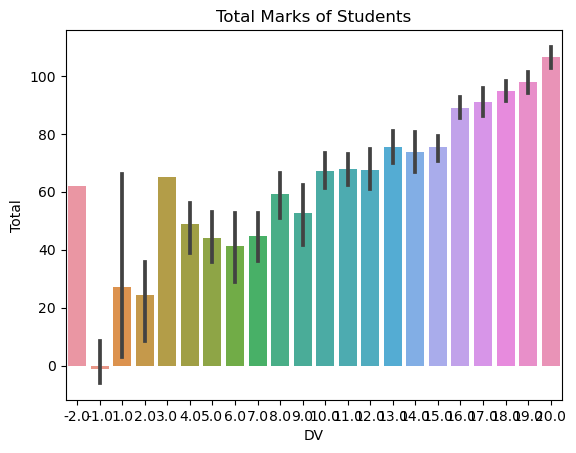

In [49]:
import seaborn as sns
sns.barplot(x='DV', y='Total', data=df)
plt.xticks(rotation=0)
plt.title('Total Marks of Students')
plt.show()

 Imports Seaborn, a Python visualization library built on top of Matplotlib

Creates a bar plot where: 

X-axis (DV): Represents categories (likely student divisions, grades, or subjects).

Y-axis (Total): Represents total marks of students.

Highlights the total performance of students in the DV Subject.

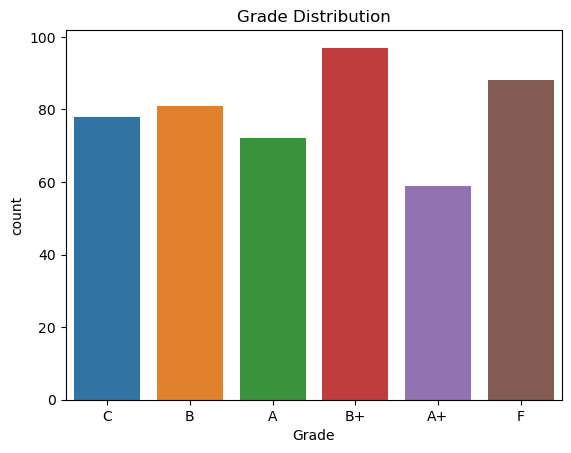

In [50]:
sns.countplot(x='Grade', data=df)
plt.title('Grade Distribution')
plt.show()


Creates a count plot where:

X-axis (Grade): Represents different grade categories.
Y-axis: Represents the count (frequency) of each grade in the dataset.

It counts the number of occurrences of each unique value in the "Grade" column and plots a bar for each.

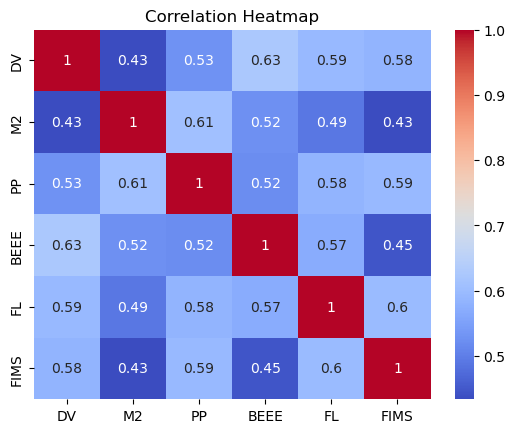

In [51]:
sns.heatmap(df.iloc[:, 1:-3].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

 Creates a heatmap showing the correlation between numerical columns in df
 
 Understand the relationships between subjects and coolwarm color palette enhances visual appeal

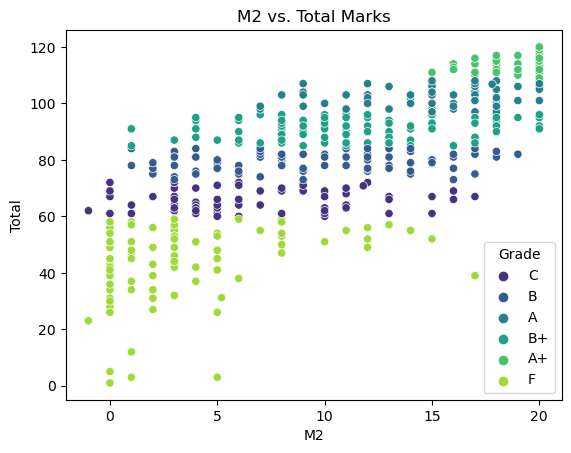

In [52]:
sns.scatterplot(x='M2', y='Total', data=df, hue='Grade', palette='viridis')
plt.title('M2 vs. Total Marks')
plt.show()

Creates a scatter plot where:

X-axis (M2) -> Represents marks in the M2 subject.

Y-axis (Total) -> Represents total marks.

data=df -> Uses df as the data source.

hue='Grade' -> Colors points based on their Grade.

palette='viridis' -> Uses the viridis color scheme.



Explore how M2 marks impact student's total marks

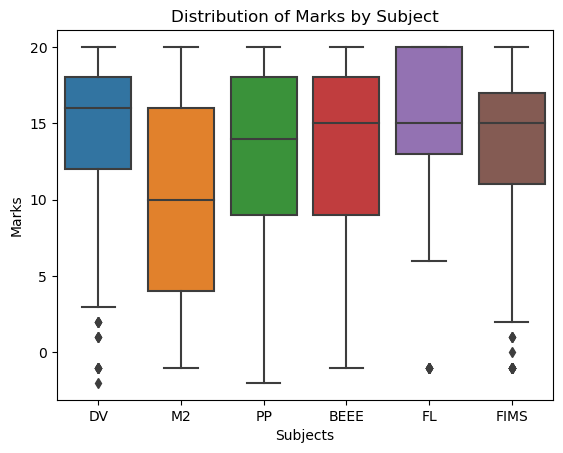

In [53]:
sns.boxplot(data=df.iloc[:, 1:-3])
plt.title('Distribution of Marks by Subject')
plt.xlabel('Subjects')
plt.ylabel('Marks')
plt.show()

Creates a box plot to show the distribution of marks across different subjects.

data=df.iloc[:, 1:-3] -> Selects all columns from index 1 to the third-last column (assumed to be subject marks).

Highlight the spread, median, and outliers for marks in each subject.Easily detect unusually high or low scores

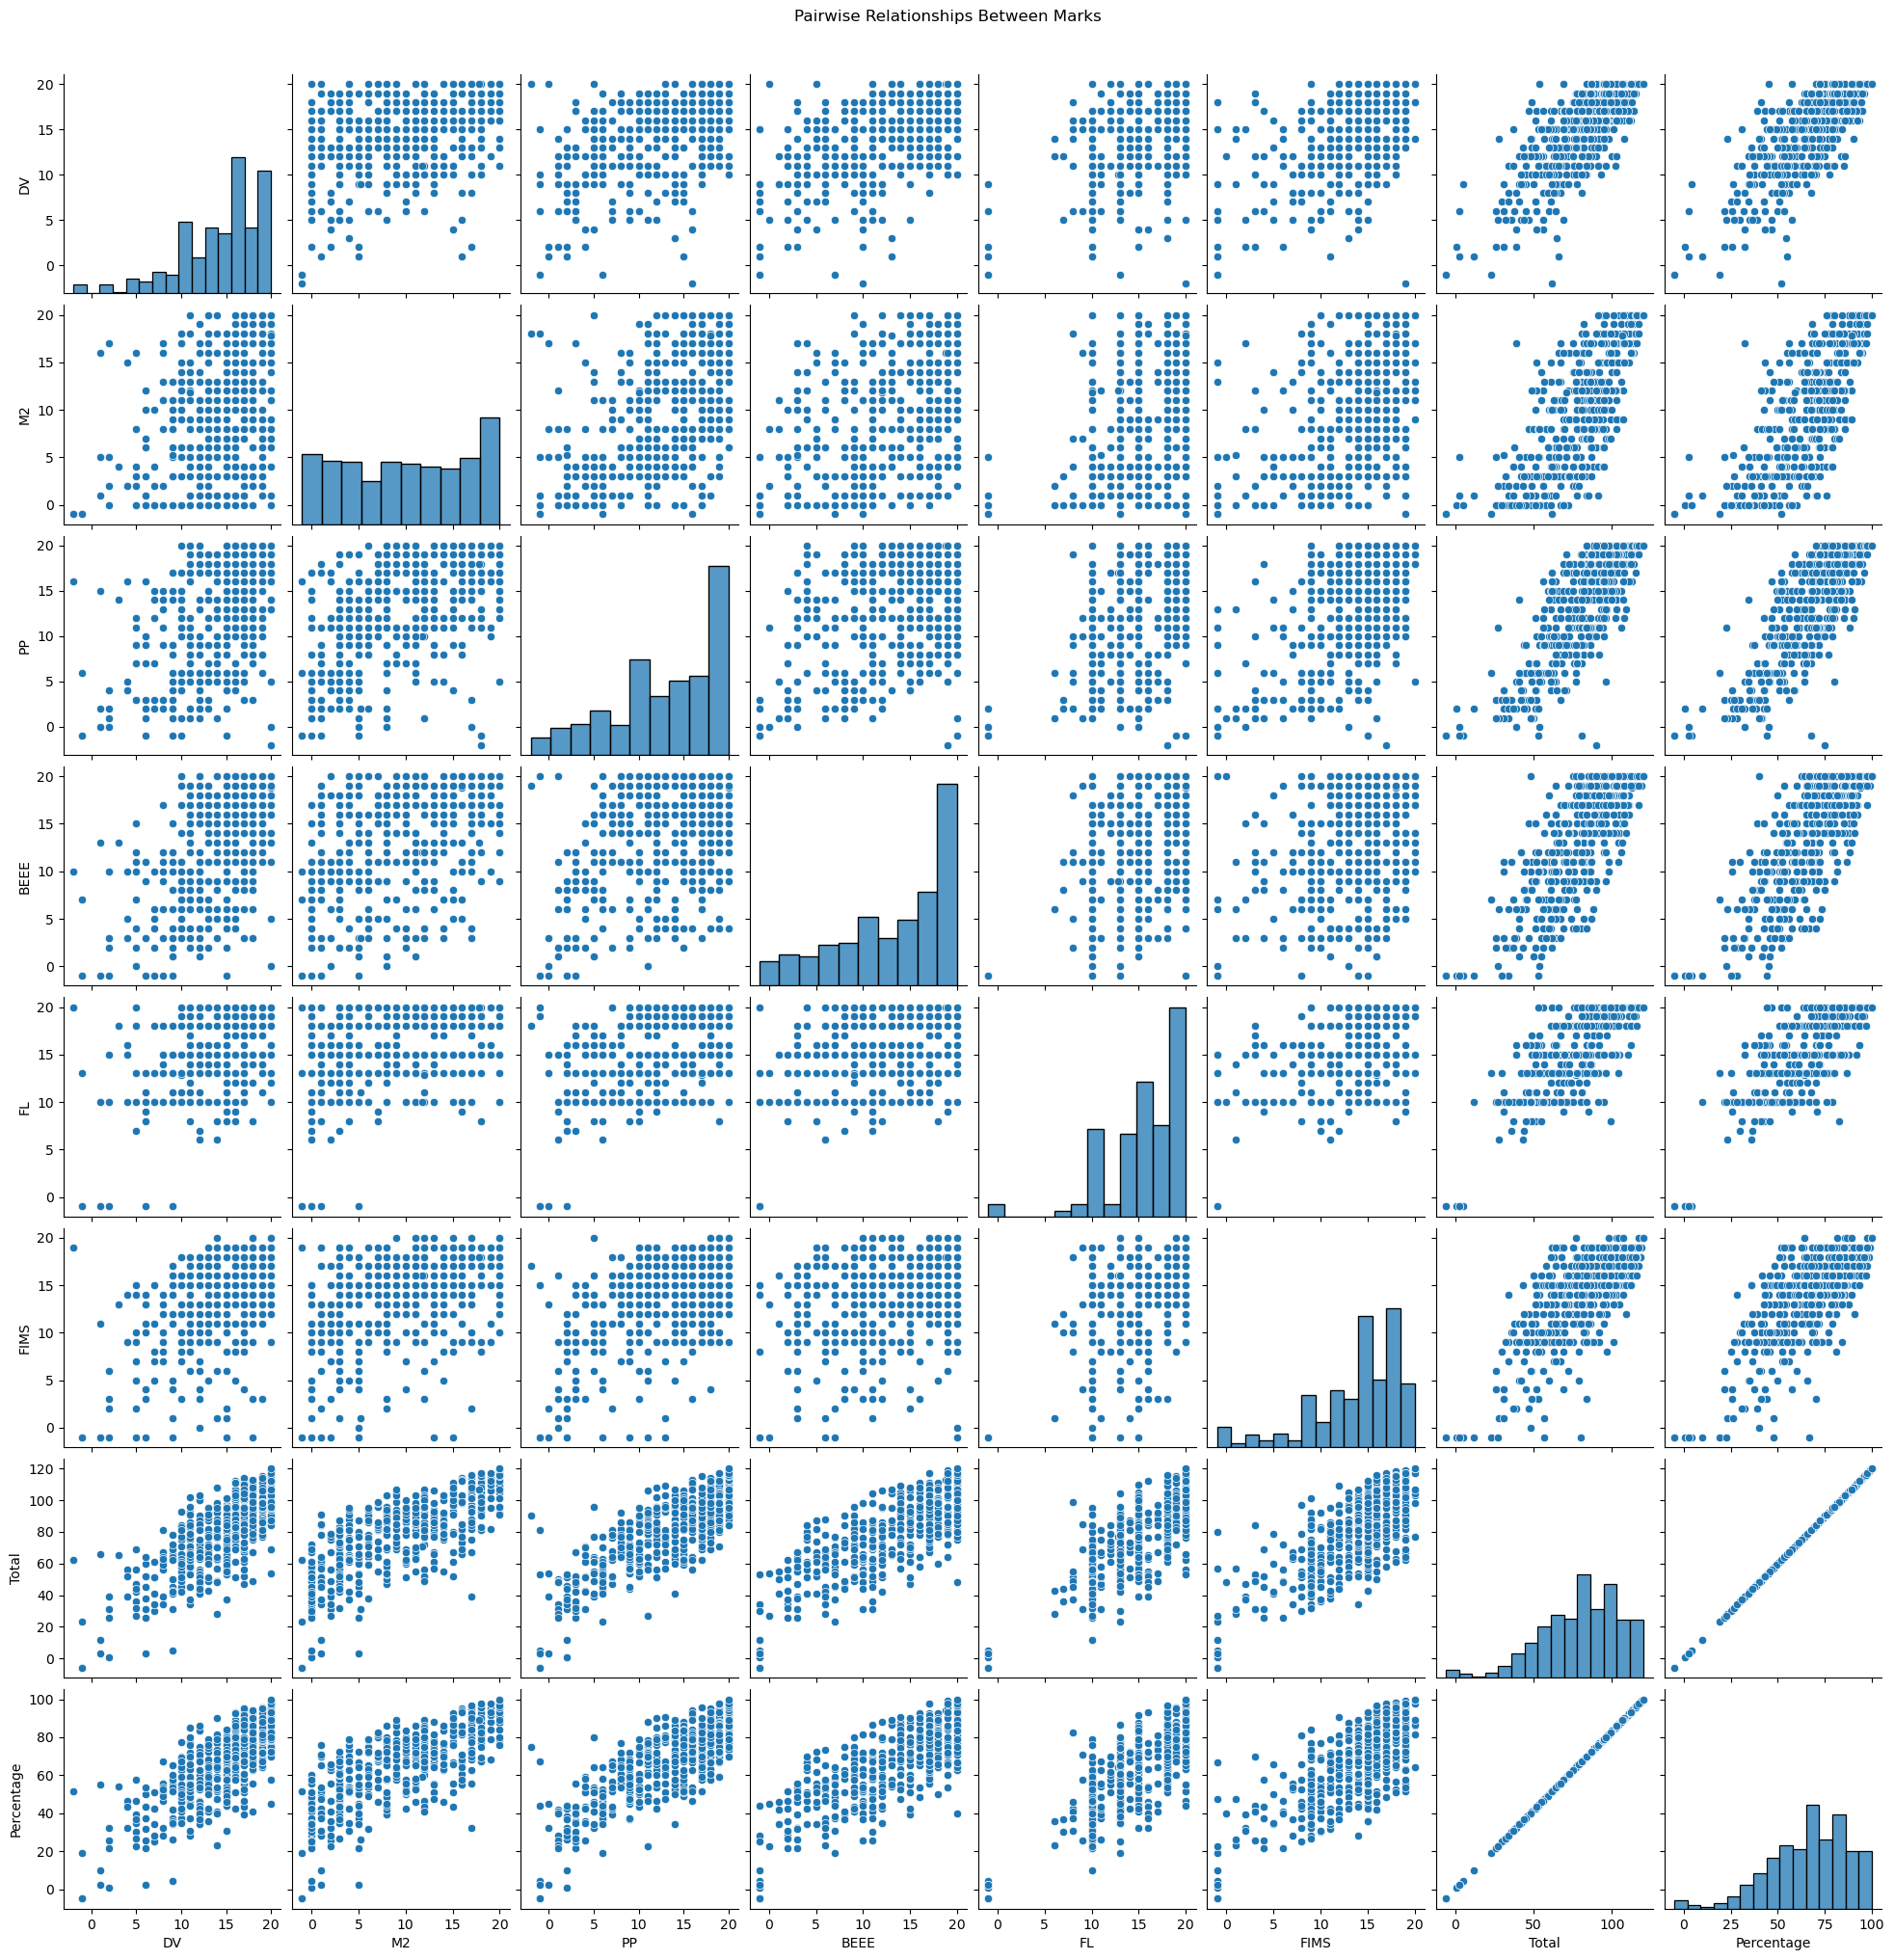

In [54]:
sns.pairplot(df.iloc[:, 1:])
plt.suptitle('Pairwise Relationships Between Marks', y=1.02)
plt.show()

Creates a pair plot to show pairwise relationships between numerical columns in df.

df.iloc[:, 1:] -> Selects all columns except the first one (assuming the first column is an index or non-numeric).

Identify patterns or trends across subjects and the total marks.

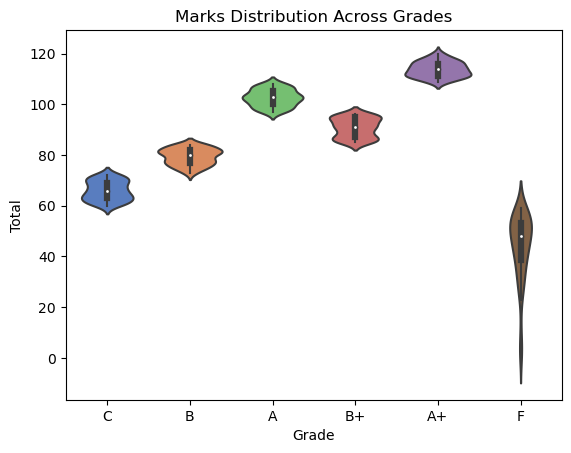

In [55]:
sns.violinplot(x='Grade', y='Total', data=df, palette='muted')
plt.title('Marks Distribution Across Grades')
plt.show()

Creates a violin plot to show marks distribution across grades.

X-axis (Grade) -> Represents different grades (A, B, C, etc.).

Y-axis (Total) -> Represents total marks.

palette='muted' -> Uses a soft color scheme for better visualization.

Combines a box plot with a kernel density estimate for better visualization of distribution.Analyze how total marks are distributed within each grade.

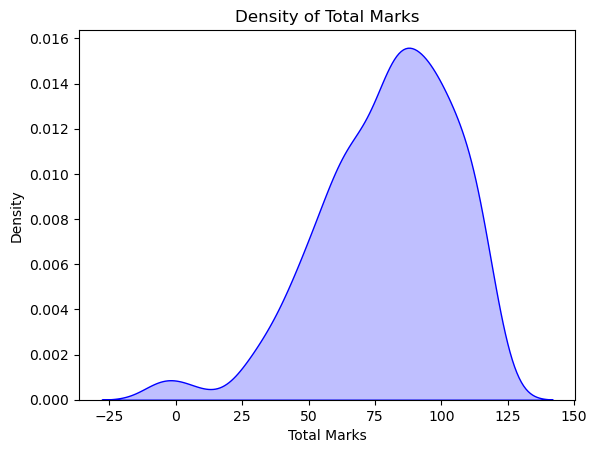

In [56]:
sns.kdeplot(df['Total'], shade=True, color='blue')
plt.title('Density of Total Marks')
plt.xlabel('Total Marks')
plt.ylabel('Density')
plt.show()

Creates a KDE (Kernel Density Estimate) plot, which shows the distribution of total marks.

df['Total'] -> Uses the Total Marks column for the distribution.

shade=True -> Fills the area under the curve for better visibility.

color='blue' -> Sets the curve color to blue.

Understand the overall distribution of total marks

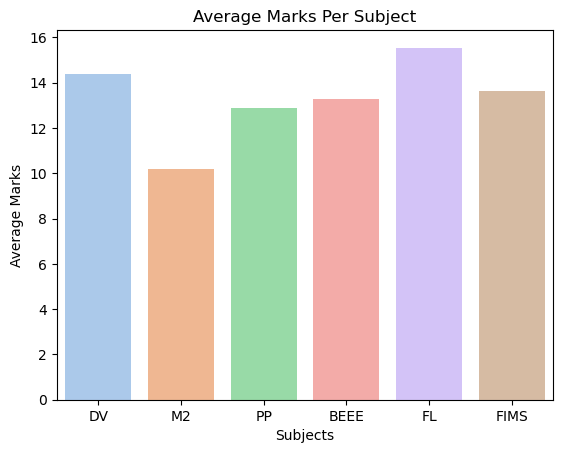

In [57]:
subject_means = df.iloc[:, 1:-3].mean()
sns.barplot(x=subject_means.index, y=subject_means.values, palette='pastel')
plt.title('Average Marks Per Subject')
plt.xlabel('Subjects')
plt.ylabel('Average Marks')
plt.show()

Computes the average (mean) marks for each subject.

df.iloc[:, 1:-3] -> Selects all columns from index 1 to the third-last column, assuming these are subject marks.

.mean() -> Computes the mean score for each subject.

Useful for performance comparison across subjects

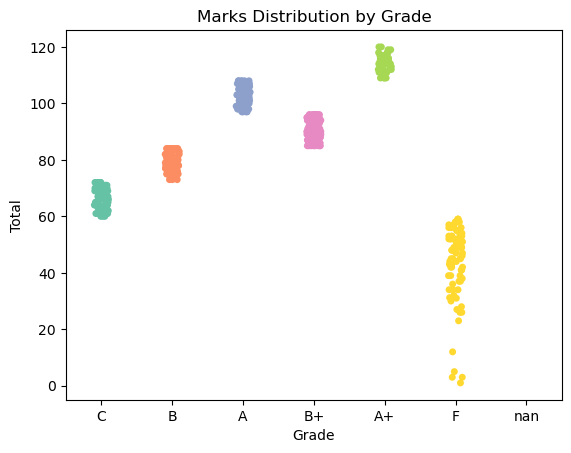

In [58]:
sns.stripplot(x='Grade', y='Total', data=df, jitter=True, palette='Set2')
plt.title('Marks Distribution by Grade')
plt.show()

Creates a strip plot to show individual data points for total marks across grades.

x='Grade' -> Grades (A, B, C, etc.) are on the X-axis.

y='Total' -> Total marks are on the Y-axis.

jitter=True -> Spreads points horizontally to prevent overlap.

palette='Set2' -> Uses a colorful pastel scheme.

Visualize student scores in relation to their grades

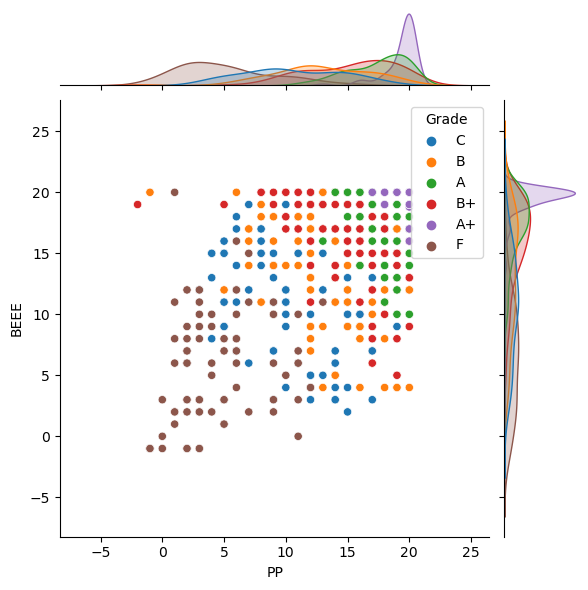

In [59]:
sns.jointplot(data=df, x="PP", y="BEEE", kind="scatter", hue="Grade")
plt.show()

Creates a joint plot, which combines:

A scatter plot (relationship between "PP" and "BEEE").

Histograms (distributions of both "PP" and "BEEE" scores).

x="PP" -> X-axis represents the PP (subject) marks.

y="BEEE" -> Y-axis represents the BEEE (subject) marks.

kind="scatter" -> Uses a scatter plot as the main visualization.

hue="Grade" -> Colors points based on Grade, making it easy to compare grade-wise performance.

2 graphs can be analyzed together in a single plot.

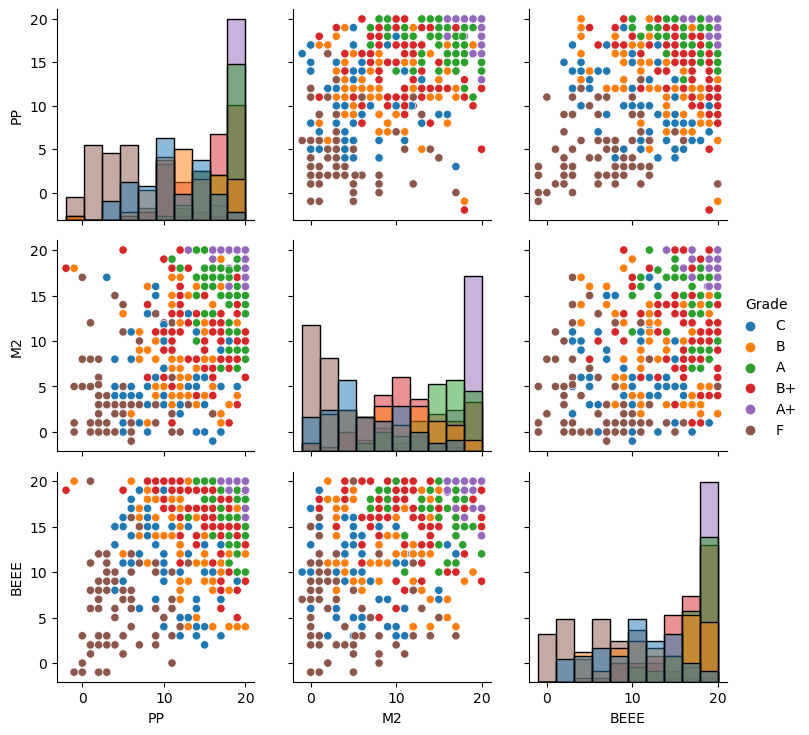

In [60]:
g = sns.PairGrid(df, vars=["PP", "M2", "BEEE"], hue="Grade")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()


Creates a PairGrid, which is a matrix of scatter plots and histograms to visualize relationships between multiple variables.

vars=["PP", "M2", "BEEE"] -> Selects PP, M2, and BEEE as the subjects for comparison.

hue="Grade" -> Colors data points based on Grade, making it easier to analyze grade-wise distribution.

Compare more than 2 graphs in a matrix type.

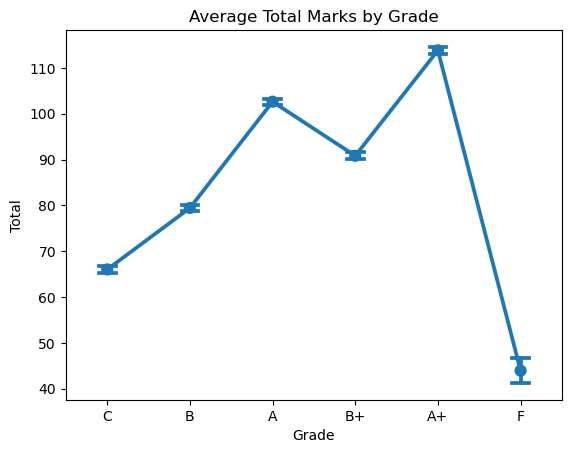

In [61]:
sns.pointplot(data=df, x="Grade", y="Total", capsize=0.2, join=True)
plt.title("Average Total Marks by Grade")
plt.show()

Creates a point plot, which shows the average total marks for each grade with confidence intervals.

x="Grade" -> Grades (A, B, C, etc.) on the X-axis.

y="Total" -> Total marks on the Y-axis.

capsize=0.2 -> Adds error bars (small horizontal caps) to indicate variability in scores.

join=True -> Connects points with a line for better trend visualization.

Visualize trends across categories

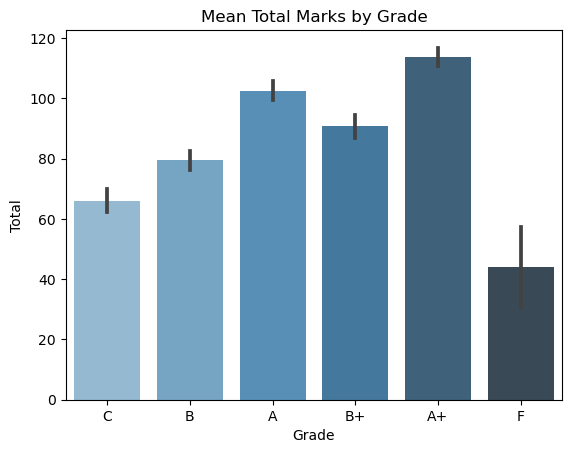

In [62]:
sns.barplot(data=df, x="Grade", y="Total", estimator=np.mean, ci="sd", palette="Blues_d")
plt.title("Mean Total Marks by Grade")
plt.show()

Creates a bar plot, which shows the mean total marks for each grade with standard deviation (SD) as error bars.

x="Grade" -> Grades (A, B, C, etc.) on the X-axis.

y="Total" -> Total marks on the Y-axis.

estimator=np.mean -> Calculates the mean total marks for each grade.

ci="sd" -> Adds error bars representing standard deviation.

palette="Blues_d" -> Uses a blue color gradient for the bars.

Displays means or other metrics with error bars

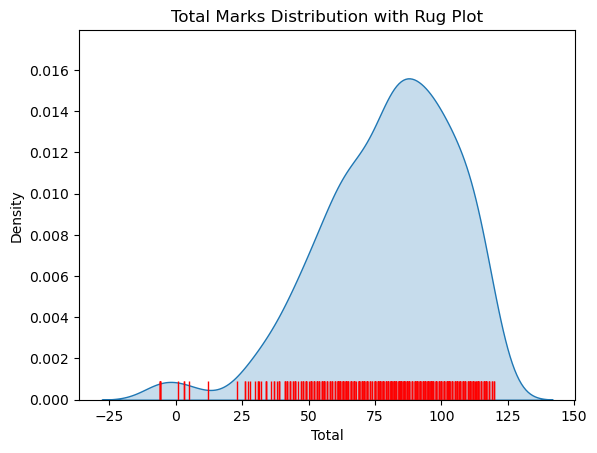

In [63]:
sns.kdeplot(data=df, x="Total", shade=True)
sns.rugplot(data=df, x="Total", height=0.05, color="red")
plt.title("Total Marks Distribution with Rug Plot")
plt.show()

Creates a KDE plot, which shows the probability distribution of total marks.

x="Total" -> Total marks on the X-axis.

shade=True -> Fills the area under the curve to improve visualization.

This gives a smooth curve representing the distribution of marks.

Highlight individual data points on continuous distributions.

In [64]:
a=df['DV']
a

0      12.0
1      19.0
2      18.0
3      15.0
4      18.0
       ... 
475    18.0
476    20.0
477    20.0
478    20.0
479    20.0
Name: DV, Length: 480, dtype: float64

Selects the DV column from the DataFrame df

In [65]:
df.set_index("S.NO", inplace=True)
df

,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
S.NO,,,,,,,,,,
1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60.00,C
2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70.00,B
3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85.00,A
4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78.33,B+
5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92.50,A+
...,...,...,...,...,...,...,...,...,...,...
476,ZETA,18.0,2.0,12.0,3.0,17.0,15.0,67.0,55.83,C
477,ZETA,20.0,6.0,16.0,11.0,20.0,14.0,87.0,72.50,B+
478,ZETA,20.0,17.8,18.0,13.0,20.0,18.0,106.8,89.00,A


Sets the S.NO column as the new index of the DataFrame.

inplace=True → Modifies df directly instead of returning a new DataFrame.

In [66]:
df.reset_index(inplace=True)
df["S No."] = range(len(df))
df.set_index("S No.", inplace=True)
print(df.head())


       S.NO SECTION    DV    M2    PP  BEEE    FL  FIMS  Total  Percentage  \
S No.                                                                        
0         1   ALPHA  12.0   0.0  17.0   9.0  19.0  15.0   72.0       60.00   
1         2   ALPHA  19.0  12.0  16.0  16.0  18.0   3.0   84.0       70.00   
2         3   ALPHA  18.0  14.0  18.0  18.0  18.0  16.0  102.0       85.00   
3         4   ALPHA  15.0   9.0  19.0  17.0  19.0  15.0   94.0       78.33   
4         5   ALPHA  18.0  17.0  19.0  19.0  20.0  18.0  111.0       92.50   

      Grade  
S No.        
0         C  
1         B  
2         A  
3        B+  
4        A+  


Resets the index of the DataFrame.

Creates a new column S No. with values from 0 to len(df) - 1

In [67]:
df['Backlog']=0
for i in range(len(df)):
    count=0
    if df['DV'][i]<10:
        count+=1
    if df['M2'][i]<10:
        count+=1
    if df['PP'][i]<10:
        count+=1
    if df['BEEE'][i]<10:
        count+=1
    if df['FL'][i]<10:
        count+=1
    if df['FIMS'][i]<10:
        count+=1
        
    df['Backlog'][i]=count
        
df

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,Backlog
S No.,,,,,,,,,,,,
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60.00,C,2
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70.00,B,1
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85.00,A,0
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78.33,B+,1
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92.50,A+,0
...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,ZETA,18.0,2.0,12.0,3.0,17.0,15.0,67.0,55.83,C,2
476,477,ZETA,20.0,6.0,16.0,11.0,20.0,14.0,87.0,72.50,B+,1
477,478,ZETA,20.0,17.8,18.0,13.0,20.0,18.0,106.8,89.00,A,0


Adding the new column Backlog which consists of backlog count of each student

In [68]:
a=df[(df.Backlog==6)]
a

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,Backlog
S No.,,,,,,,,,,,,
82,83,BETA,2.0,0.0,2.0,-1.0,-1.0,-1.0,1.0,0.83,F,6
210,211,EPSILON,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-6.0,-5.00,NaN,6
302,303,OMEGA,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-6.0,-5.00,NaN,6
368,369,ZETA,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-6.0,-5.00,NaN,6
380,381,OMEGA,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-6.0,-5.00,NaN,6
416,417,OMEGA,9.0,0.0,-1.0,-1.0,-1.0,-1.0,5.0,4.17,F,6
424,425,SIGMA,6.0,1.0,-1.0,-1.0,-1.0,-1.0,3.0,2.50,F,6
453,454,ZETA,1.0,5.0,0.0,-1.0,-1.0,-1.0,3.0,2.50,F,6
461,462,ZETA,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-6.0,-5.00,NaN,6


Filters the DataFrame df where the column "Backlog" is equal to 6

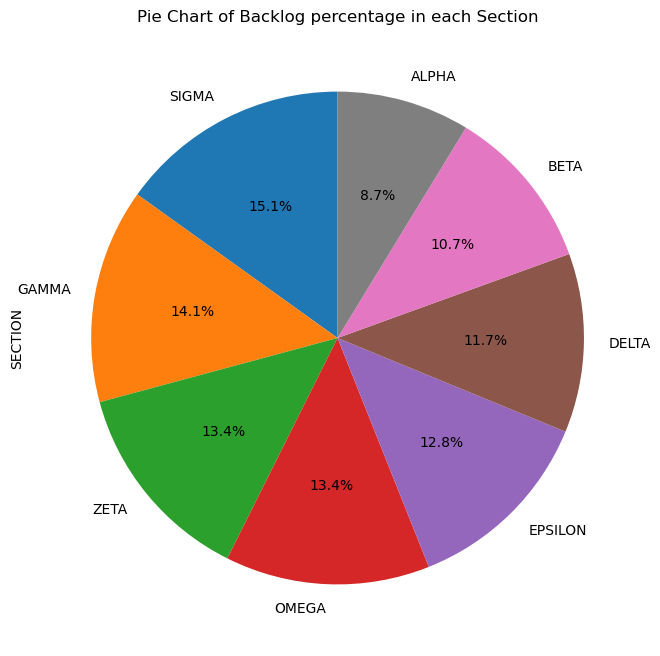

In [69]:
b=df.loc[(df["Backlog"]>=1)]
a=b["SECTION"].value_counts()
a.plot(kind='pie', figsize=(8, 8),autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of Backlog percentage in each Section")
plt.show()

Filters the DataFrame df, keeping only rows where Backlog is 1 or more (students with backlogs).

Filters students with backlogs, counts them per section, and visualizes the distribution using a pie chart.

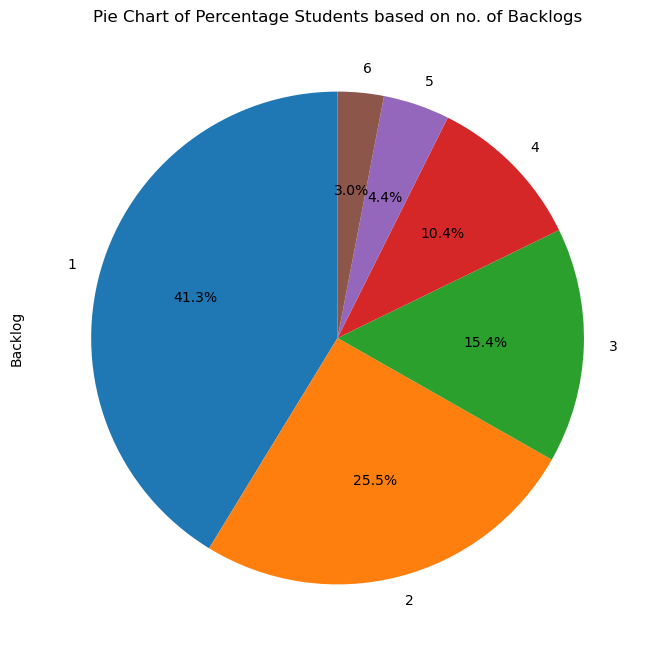

In [70]:
b=df.loc[(df["Backlog"]>=1)]
a=b["Backlog"].value_counts()
a.plot(kind='pie', figsize=(8, 8),autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of Percentage Students based on no. of Backlogs")
plt.show()

Filters students with at least one backlog, counts occurrences of different backlog numbers, and visualizes their distribution using a pie chart

In [71]:
a=df[(df.DV<10)]
a.SECTION.value_counts()

BETA       15
DELTA      11
ZETA       11
ALPHA       9
SIGMA       7
EPSILON     6
OMEGA       6
Name: SECTION, dtype: int64

Filters students who scored less than 10 in the DV column, counts the number of such students in each SECTION, and displays the results.

In [72]:
a=df[(df.PP<10)]
a.SECTION.value_counts()

GAMMA      28
OMEGA      27
SIGMA      23
ZETA       18
EPSILON    14
DELTA      10
BETA        8
ALPHA       7
Name: SECTION, dtype: int64

Filters students who scored less than 10 in the PP column, counts the number of such students in each SECTION, and displays the results.

In [73]:
df.loc[(df["PP"]>=18) & (df["PP"]<=20),["Programming Skills"]]="Very Good"
df.loc[(df["PP"]>=15) & (df["PP"]<=17),["Programming Skills"]]="Good"
df.loc[(df["PP"]>=12) & (df["PP"]<=14),["Programming Skills"]]="Average"
df.loc[(df["PP"]<=11),["Programming Skills"]]="Poor"
df

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,Backlog,Programming Skills
S No.,,,,,,,,,,,,,
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60.00,C,2,Good
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70.00,B,1,Good
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85.00,A,0,Very Good
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78.33,B+,1,Very Good
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92.50,A+,0,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,ZETA,18.0,2.0,12.0,3.0,17.0,15.0,67.0,55.83,C,2,Average
476,477,ZETA,20.0,6.0,16.0,11.0,20.0,14.0,87.0,72.50,B+,1,Good
477,478,ZETA,20.0,17.8,18.0,13.0,20.0,18.0,106.8,89.00,A,0,Very Good


Categorizing students based on their PP scores and assigns a Programming Skills label accordingly.

In [74]:
df["Programming Skills"].value_counts()

Poor         182
Very Good    140
Good          86
Average       72
Name: Programming Skills, dtype: int64

Counts the occurrences of each unique value in the Programming Skills column

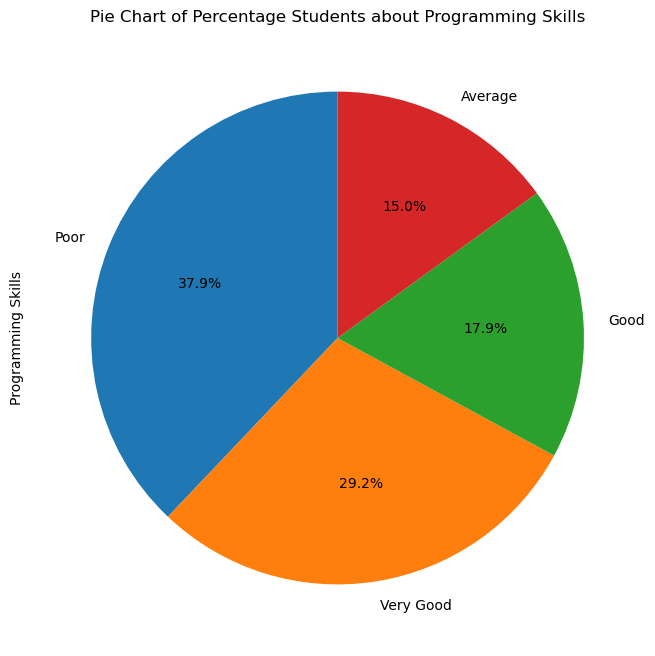

In [75]:
b=df.loc[df["PP"]>=-2]
a=b["Programming Skills"].value_counts()
a.plot(kind='pie', figsize=(8, 8),autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of Percentage Students about Programming Skills")
plt.show()

Selects all rows where PP is greater than or equal to -2 i.e., selecting all students except malpracticed students

In [76]:
def daSkills(marks):
    if 18<= marks <= 20:
        return 'very good'
    elif  15<= marks <= 17:
        return 'good'
    elif 12 <= marks <= 14:
        return 'Avg'
    else:
        return 'poor'
df['DA_Skills'] = df['DV'].apply(daSkills)
df

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,Backlog,Programming Skills,DA_Skills
S No.,,,,,,,,,,,,,,
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60.00,C,2,Good,Avg
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70.00,B,1,Good,very good
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85.00,A,0,Very Good,very good
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78.33,B+,1,Very Good,good
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92.50,A+,0,Very Good,very good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,ZETA,18.0,2.0,12.0,3.0,17.0,15.0,67.0,55.83,C,2,Average,very good
476,477,ZETA,20.0,6.0,16.0,11.0,20.0,14.0,87.0,72.50,B+,1,Good,very good
477,478,ZETA,20.0,17.8,18.0,13.0,20.0,18.0,106.8,89.00,A,0,Very Good,very good


Categorizing students based on their DV scores and assigns a DA_Skills label accordingly.

In [77]:
df["DA_Skills"].value_counts()

good         146
very good    140
poor         118
Avg           76
Name: DA_Skills, dtype: int64

Counts the occurrences of each unique value in the Data Analysis Skills column

In [78]:
df['Status']=0
for i in range(len(df)):
    if df['DV'][i]==20 or df['M2'][i]==20 or df['PP'][i]==20 or df['BEEE'][i]==20 or df['FL'][i]==20 or df['FIMS'][i]==20:
        df['Status'][i]='True'
    else:
        df['Status'][i]='False'
        
df

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,Backlog,Programming Skills,DA_Skills,Status
S No.,,,,,,,,,,,,,,,
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60.00,C,2,Good,Avg,False
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70.00,B,1,Good,very good,False
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85.00,A,0,Very Good,very good,False
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78.33,B+,1,Very Good,good,False
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92.50,A+,0,Very Good,very good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,ZETA,18.0,2.0,12.0,3.0,17.0,15.0,67.0,55.83,C,2,Average,very good,False
476,477,ZETA,20.0,6.0,16.0,11.0,20.0,14.0,87.0,72.50,B+,1,Good,very good,True
477,478,ZETA,20.0,17.8,18.0,13.0,20.0,18.0,106.8,89.00,A,0,Very Good,very good,True


Adding "Status" column to df, which:

Checks if a student scored 20 in any subject (DV, M2, PP, BEEE, FL, or FIMS).

If any of these subjects has a score of 20, the "Status" column is set to "True".

Otherwise, "Status" is set to "False".

In [79]:
df["Status"].value_counts()

False    295
True     185
Name: Status, dtype: int64

Counts the occurrences of each unique value in the status column

In [80]:
a1=df.loc[(df["Status"]=="True")]
a1

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,Backlog,Programming Skills,DA_Skills,Status
S No.,,,,,,,,,,,,,,,
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92.50,A+,0,Very Good,very good,True
6,7,ALPHA,15.0,10.0,20.0,20.0,15.0,14.0,94.0,78.33,B+,0,Very Good,good,True
7,8,ALPHA,17.0,17.0,19.0,20.0,19.0,13.0,105.0,87.50,A,0,Very Good,good,True
8,9,ALPHA,10.0,18.0,-1.0,20.0,19.0,15.0,81.0,67.50,B,1,Poor,poor,True
9,10,ALPHA,18.0,19.0,20.0,20.0,20.0,15.0,112.0,93.33,A+,0,Very Good,very good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,474,ZETA,20.0,20.0,20.0,20.0,20.0,20.0,120.0,100.00,A+,0,Very Good,very good,True
476,477,ZETA,20.0,6.0,16.0,11.0,20.0,14.0,87.0,72.50,B+,1,Good,very good,True
477,478,ZETA,20.0,17.8,18.0,13.0,20.0,18.0,106.8,89.00,A,0,Very Good,very good,True


Filters df to select only the rows where "Status" is "True"

In [81]:
mean_alpha=df[df['SECTION']=='ALPHA'].mean()
mean_alpha

S.NO          30.500000
DV            14.033333
M2            13.733333
PP            16.050000
BEEE          15.616667
FL            16.550000
FIMS          12.850000
Total         88.833333
Percentage    74.027333
Backlog        0.716667
dtype: float64

Calculating mean of all students in each subject in ALPHA section

In [82]:
mean_beta=df[df['SECTION']=='BETA'].mean()
mean_beta

S.NO          90.500000
DV            12.083333
M2            13.683333
PP            15.666667
BEEE          12.700000
FL            16.030000
FIMS          12.966667
Total         83.130000
Percentage    69.274667
Backlog        1.133333
dtype: float64

Calculating mean of all students in each subject in BETA section

In [83]:
aggregated_data = df.groupby(['SECTION']).mean()
aggregated_data

,S.NO,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Backlog
SECTION,,,,,,,,,,
ALPHA,30.500000,14.033333,13.733333,16.050000,15.616667,16.550000,12.850000,88.833333,74.027333,0.716667
BETA,90.500000,12.083333,13.683333,15.666667,12.700000,16.030000,12.966667,83.130000,69.274667,1.133333
DELTA,150.500000,13.450000,11.450000,15.000000,11.033333,15.916667,15.350000,82.200000,68.500667,1.216667
EPSILON,214.816667,14.316667,9.896667,12.733333,10.263333,14.550000,16.083333,77.843333,64.868833,1.366667
GAMMA,270.500000,15.933333,7.800000,9.400000,14.866667,15.716667,13.050000,76.766667,63.971500,1.533333
OMEGA,369.833333,14.866667,7.966667,10.166667,14.850000,15.300000,12.016667,75.166667,62.638833,1.700000
SIGMA,370.166667,15.383333,7.786667,11.466667,13.883333,15.216667,12.716667,76.453333,63.711167,1.616667
ZETA,427.183333,15.166667,9.096667,12.416667,12.933333,15.066667,13.900000,78.580000,65.483500,1.650000


Calculating mean of all students in each subject and in section-wise

In [84]:
df[df['SECTION']=='ALPHA'].std()

S.NO          17.464249
DV             4.654018
M2             5.161351
PP             5.140154
BEEE           4.476271
FL             3.402018
FIMS           4.037221
Total         20.850693
Percentage    17.375420
Backlog        1.090664
dtype: float64

Calculating standard deviation of all students in each subject in ALPHA section

In [85]:
std_data = df.groupby(['SECTION']).std()
std_data

,S.NO,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Backlog
SECTION,,,,,,,,,,
ALPHA,17.464249,4.654018,5.161351,5.140154,4.476271,3.402018,4.037221,20.850693,17.375420,1.090664
BETA,17.464249,4.465657,5.484931,5.183634,6.068256,3.877764,4.395555,22.979514,19.149605,1.395716
DELTA,17.464249,4.381877,6.124209,4.994913,5.698548,3.585714,3.545467,21.145821,17.621306,1.316025
EPSILON,34.117688,4.143574,5.909773,5.174470,5.772934,4.450957,4.235810,24.291453,20.243158,1.389631
GAMMA,17.464249,2.208356,5.885345,3.945390,4.537851,3.884309,4.350823,19.912833,16.594351,1.346265
OMEGA,43.493295,4.910959,6.754701,6.396945,5.879655,5.046563,5.664315,30.011956,25.009966,1.768845
SIGMA,43.493295,4.166418,5.738820,5.472479,5.716736,4.174546,4.808508,24.668895,20.557238,1.574066
ZETA,54.155298,6.394295,6.752124,6.997074,6.895999,5.433314,5.736295,32.753640,27.294953,1.857874


Calculating standard deviation of all students in each subject and in section-wise